# DIABETES PREDICTION

In [56]:
## Problem Statement
"""
Diabetes is a type of chronic disease which is more common among the
people of all age groups. Predicting this disease at an early stage can help
a person to take the necessary
accordingly to either prevent the occ
disease(For people who

Task:
1. Prepare the data-set
2. Build a model which
"""

'\nDiabetes is a type of chronic disease which is more common among the\npeople of all age groups. Predicting this disease at an early stage can help\na person to take the necessary\naccordingly to either prevent the occ\ndisease(For people who\n\nTask:\n1. Prepare the data-set\n2. Build a model which\n'

### Libraries & Imports

In [57]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [58]:
# Importing the dataset
df = pd.read_csv("dataset.csv")
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

### Data Cleaning

In [59]:
# Size of the dataset
df.shape

(768, 9)

In [60]:
# Analysing the data type of variables to work with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
# Descriptive stats of the dataset
# Observing the nature of the numerical features
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [62]:
# Checking the balance of the dataset
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [63]:
(df['Outcome'].value_counts()/len(df))*100

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

### Exploratory Data Analysis

In [64]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\Tanush\AppData\Local\Temp\ipykernel_12204\2735045449.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
C:\Users\Tanush\AppData\Local\Temp\ipykernel_12204\2735045449.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Glucose, bins=2

<Axes: xlabel='Age', ylabel='Density'>

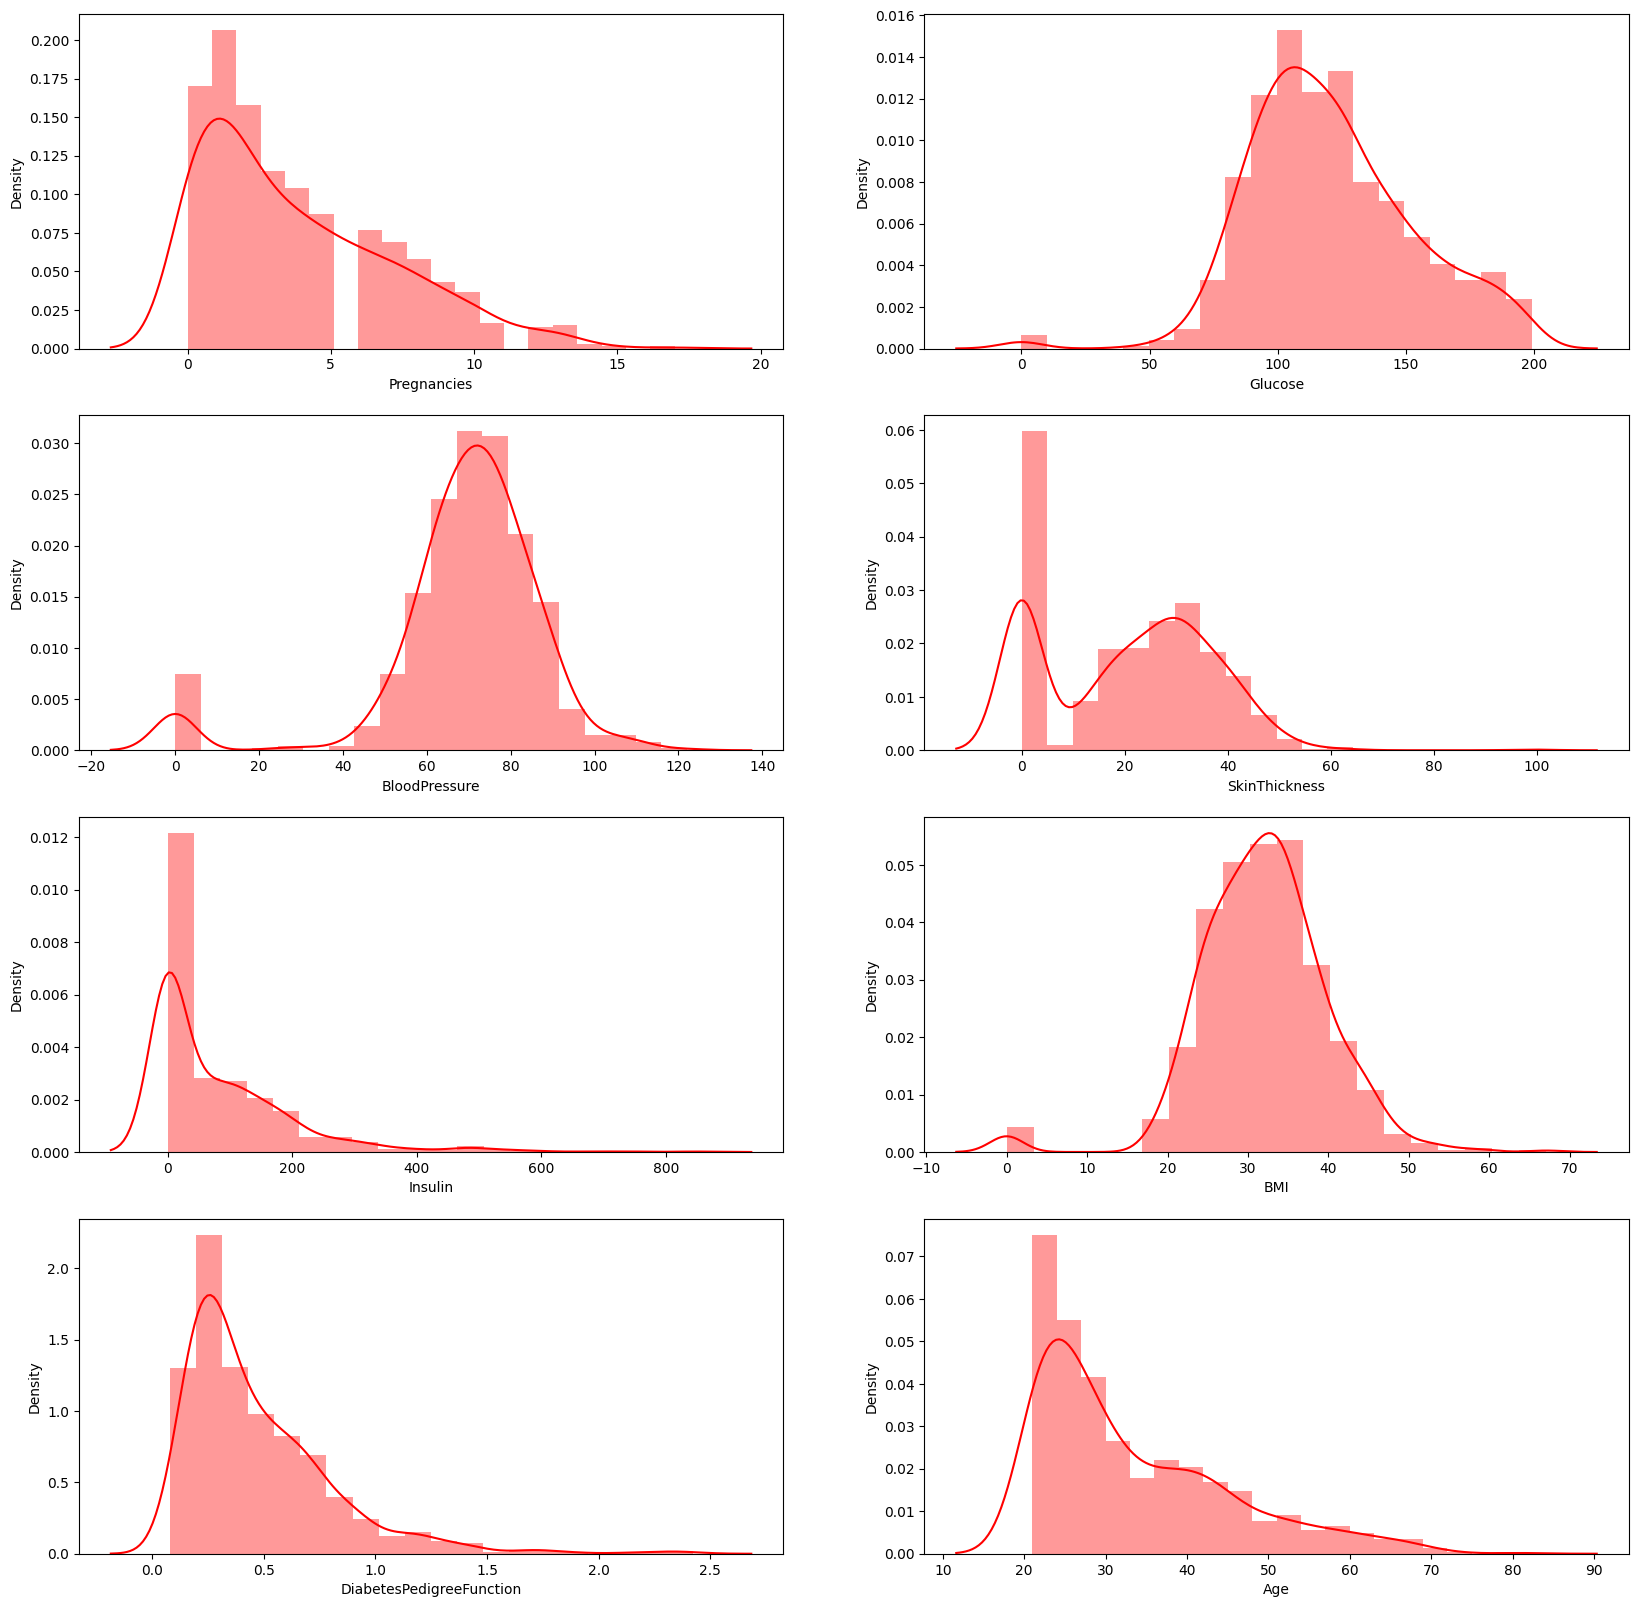

In [65]:
# Checking the density distribution of features
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")


In [66]:
# Analysis of "Pregnancy" feature wrt "Outcome"
df.groupby("Outcome").Pregnancies.agg(('median', 'max', 'min'))
# It would be in the best of interests to ignore this feature

median  max  min
Outcome                  
0           2.0   13    0
1           4.0   17    0

In [67]:
# Analysis of "Glucose" feature wrt "Outcome"
df.groupby("Outcome").Glucose.agg(('median', 'max', 'min'))

median  max  min
Outcome                  
0         107.0  197    0
1         140.0  199    0

In [68]:
# Analysis of "BloodPressure" feature wrt "Outcome"
df.groupby("Outcome").BloodPressure.agg(('median', 'max', 'min'))

median  max  min
Outcome                  
0          70.0  122    0
1          74.0  114    0

In [69]:
# Analysis of "SkinThickness" feature wrt "Outcome"
df.groupby("Outcome").SkinThickness.agg(('median', 'max', 'min'))

median  max  min
Outcome                  
0          21.0   60    0
1          27.0   99    0

In [70]:
# Analysis of "Insulin" feature wrt "Outcome"
df.groupby("Outcome").Insulin.agg(('median', 'max', 'min'))

median  max  min
Outcome                  
0          39.0  744    0
1           0.0  846    0

In [71]:
# Analysis of "BMI" feature wrt "Outcome"
df.groupby("Outcome").BMI.agg(('median', 'max', 'min'))

median   max  min
Outcome                   
0         30.05  57.3  0.0
1         34.25  67.1  0.0

In [72]:
# Analysis of "Age" feature wrt "Outcome"
df.groupby("Outcome").Age.agg(('median', 'max', 'min'))

median  max  min
Outcome                  
0          27.0   81   21
1          36.0   70   21

In [73]:
# Analysis of "DiabetesPedigreeFunction" feature wrt "Outcome"
df.groupby("Outcome").DiabetesPedigreeFunction.agg(('median', 'max', 'min'))

median    max    min
Outcome                      
0         0.336  2.329  0.078
1         0.449  2.420  0.088

In [74]:
# Overall Correlation between features
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

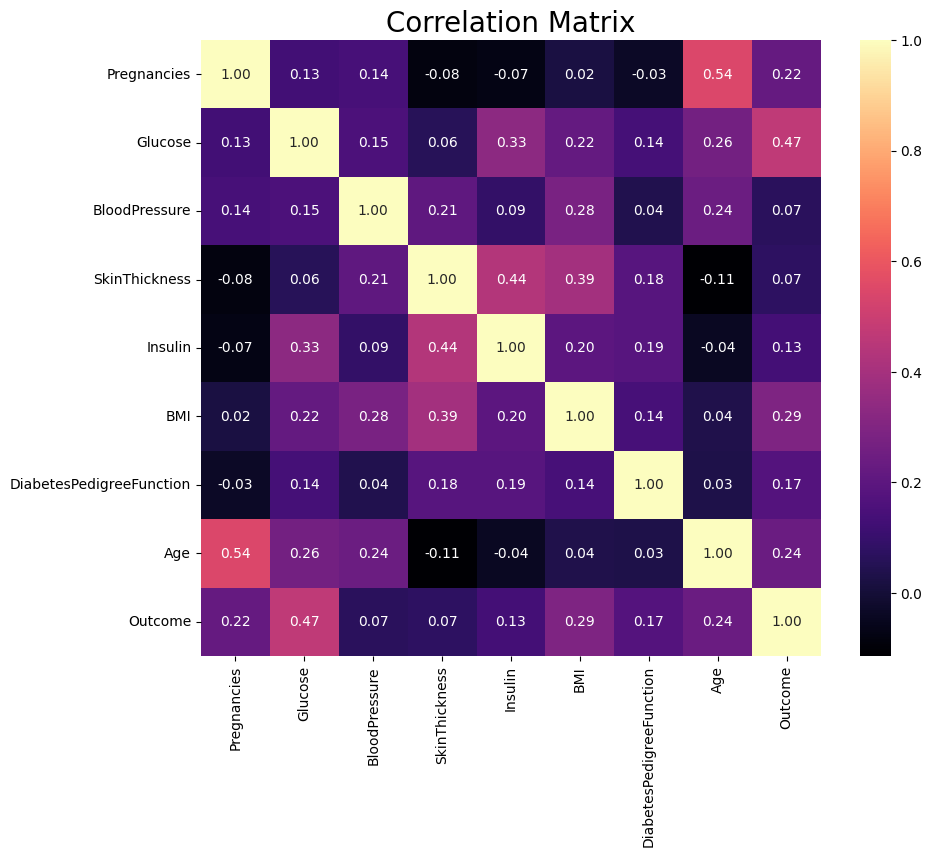

In [75]:
# Heatmap representation of Correlation
f, ax = plt.subplots(figsize=[10,8])
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# This is not the final analysis because relation might change after preprocessing.

### Data Preprocessing

In [76]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [77]:
# Replacing 0 entries with NaN to simplify identification of missing values
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)

In [78]:
df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
123          5.0    132.0           80.0            NaN      NaN  26.8   
470          1.0    144.0           82.0           40.0      NaN  41.3   
345          8.0    126.0           88.0           36.0    108.0  38.5   
67           2.0    109.0           92.0            NaN      NaN  42.7   
427          1.0    181.0           64.0           30.0    180.0  34.1   
399          3.0    193.0           70.0           31.0      NaN  34.9   
9            8.0    125.0           96.0            NaN      NaN   NaN   
666          4.0    145.0           82.0           18.0      NaN  32.5   
497          2.0     81.0           72.0           15.0     76.0  30.1   
12          10.0    139.0           80.0            NaN      NaN  27.1   

     DiabetesPedigreeFunction  Age  Outcome  
123                     0.186   69        0  
470                     0.607   28        0  
345                     0.349   49        0  
67                      0.845   54        0  
427                     0.328   38        1  
399                     0.241   25        1  
9                       0.232   54        1  
666                     0.235   70        1  
497                     0.547   25        0  
12                      1.441   57        0

In [79]:
# Finding missing values
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [80]:
# Checking for median values of features
group_means = df.groupby('Outcome').median()
group_means

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Outcome                                                                      
0                3.0    107.0           70.0           27.0    102.5  30.1   
1                5.0    140.0           74.5           32.0    169.5  34.3   

         DiabetesPedigreeFunction   Age  
Outcome                                  
0                           0.336  27.0  
1                           0.449  36.0

In [81]:
# Handling missing values in BMI feature
df['BMI'] = df.groupby('Outcome')['BMI'].transform(lambda x: x.fillna(x.median()))

In [82]:
df.isnull().sum()
# Missing values in BMI features have been handles

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [83]:
# Handling missing values in features with corresponding median values
for col in df.columns:
    if col != "Outcome":
        df[col] = df.groupby('Outcome')[col].transform(lambda x: x.fillna(x.median()))
    else:
        continue

In [84]:
df.isnull().sum()
# Missing values in all features have been imputed

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [85]:
df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
728          2.0    175.0           88.0           27.0    102.5  22.9   
63           2.0    141.0           58.0           34.0    128.0  25.4   
628          5.0    128.0           80.0           27.0    102.5  34.6   
461          1.0     71.0           62.0           27.0    102.5  21.8   
396          3.0     96.0           56.0           34.0    115.0  24.7   
568          4.0    154.0           72.0           29.0    126.0  31.3   
272          3.0    122.0           78.0           27.0    102.5  23.0   
706         10.0    115.0           74.5           32.0    169.5  34.3   
240          1.0     91.0           64.0           24.0    102.5  29.2   
439          6.0    107.0           88.0           27.0    102.5  36.8   

     DiabetesPedigreeFunction  Age  Outcome  
728                     0.326   22        0  
63                      0.699   24        0  
628                     0.144   45        0  
461                     0.416   26        0  
396                     0.944   39        0  
568                     0.338   37        0  
272                     0.254   40        0  
706                     0.261   30        1  
240                     0.192   21        0  
439                     0.727   31        0

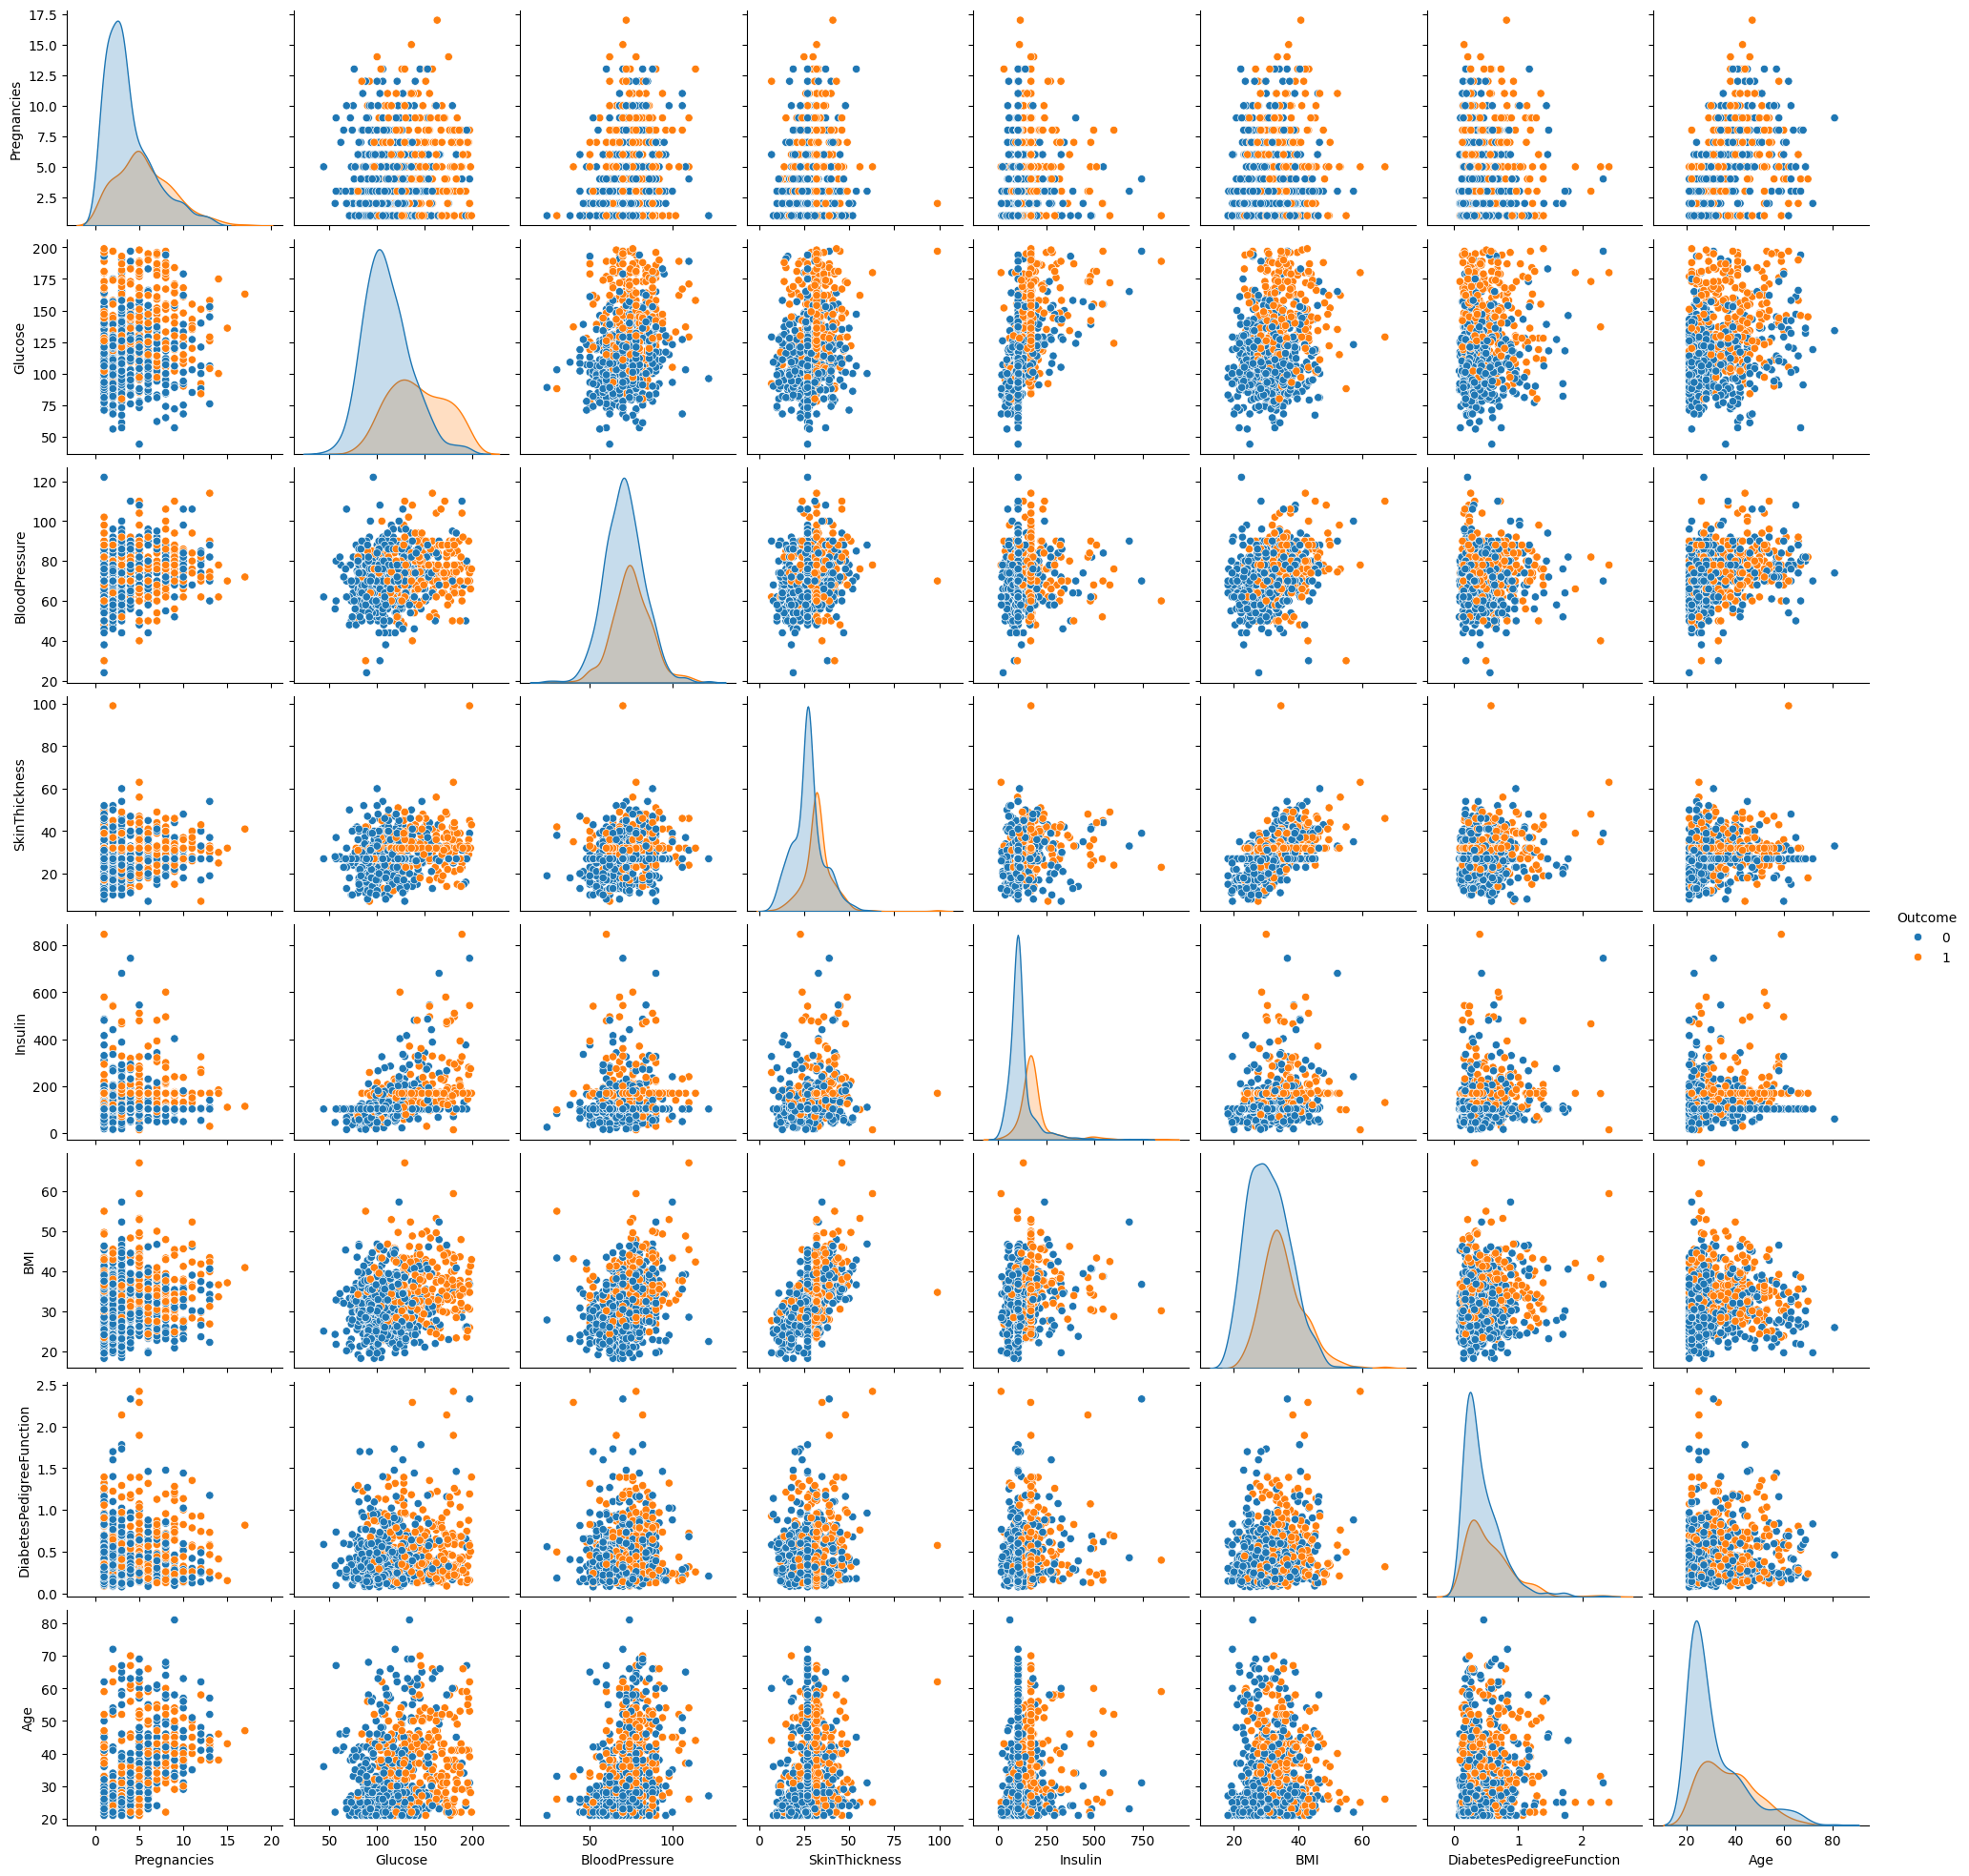

In [86]:
# Cheecking for outliers
plot = sns.pairplot(df, hue="Outcome")

In [87]:
# Z-Score method to remove outliers
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.539221  0.864625       0.032180       0.665181  0.311604  0.169483   
1       1.122584  1.204727       0.528124       0.010112  0.440843  0.848549   
2       1.203944  2.014265       0.693438       0.327535  0.311604  1.328478   
3       1.122584  1.073339       0.528124       0.685405  0.536303  0.630399   
4       0.206860  0.503310       2.677212       0.665181  0.294758  1.551096   
..           ...       ...            ...            ...       ...       ...   
763     1.868666  0.679177       0.298449       2.128317  0.429525  0.067679   
764     0.790223  0.010607       0.197495       0.235210  0.440843  0.634868   
765     0.206860  0.022240       0.032180       0.685405  0.334153  0.906722   
766     1.122584  0.141994       1.024067       0.327535  0.311604  0.339533   
767     1.122584  0.941952       0.197495       0.214986  0.440843  0.295903   

     DiabetesPedigreeFunction       Age

In [88]:
# Z-Score threshold is set to 3.0
threshold = 3
print(np.where(z>3))

(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 120,
       123, 125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 286,
       298, 330, 370, 370, 371, 392, 395, 409, 415, 445, 445, 445, 453,
       455, 459, 486, 549, 579, 584, 593, 597, 621, 645, 655, 666, 673,
       684, 691, 695, 753], dtype=int64), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4,
       4, 6, 4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2, 3,
       4, 6, 2, 6, 4, 4, 7, 5, 7, 2, 4, 4], dtype=int64))


In [89]:
# Outliers are removed
df = df[(z<3).all(axis=1)]

In [90]:
# Total of 54 outliers have been removed
df.shape

(719, 9)

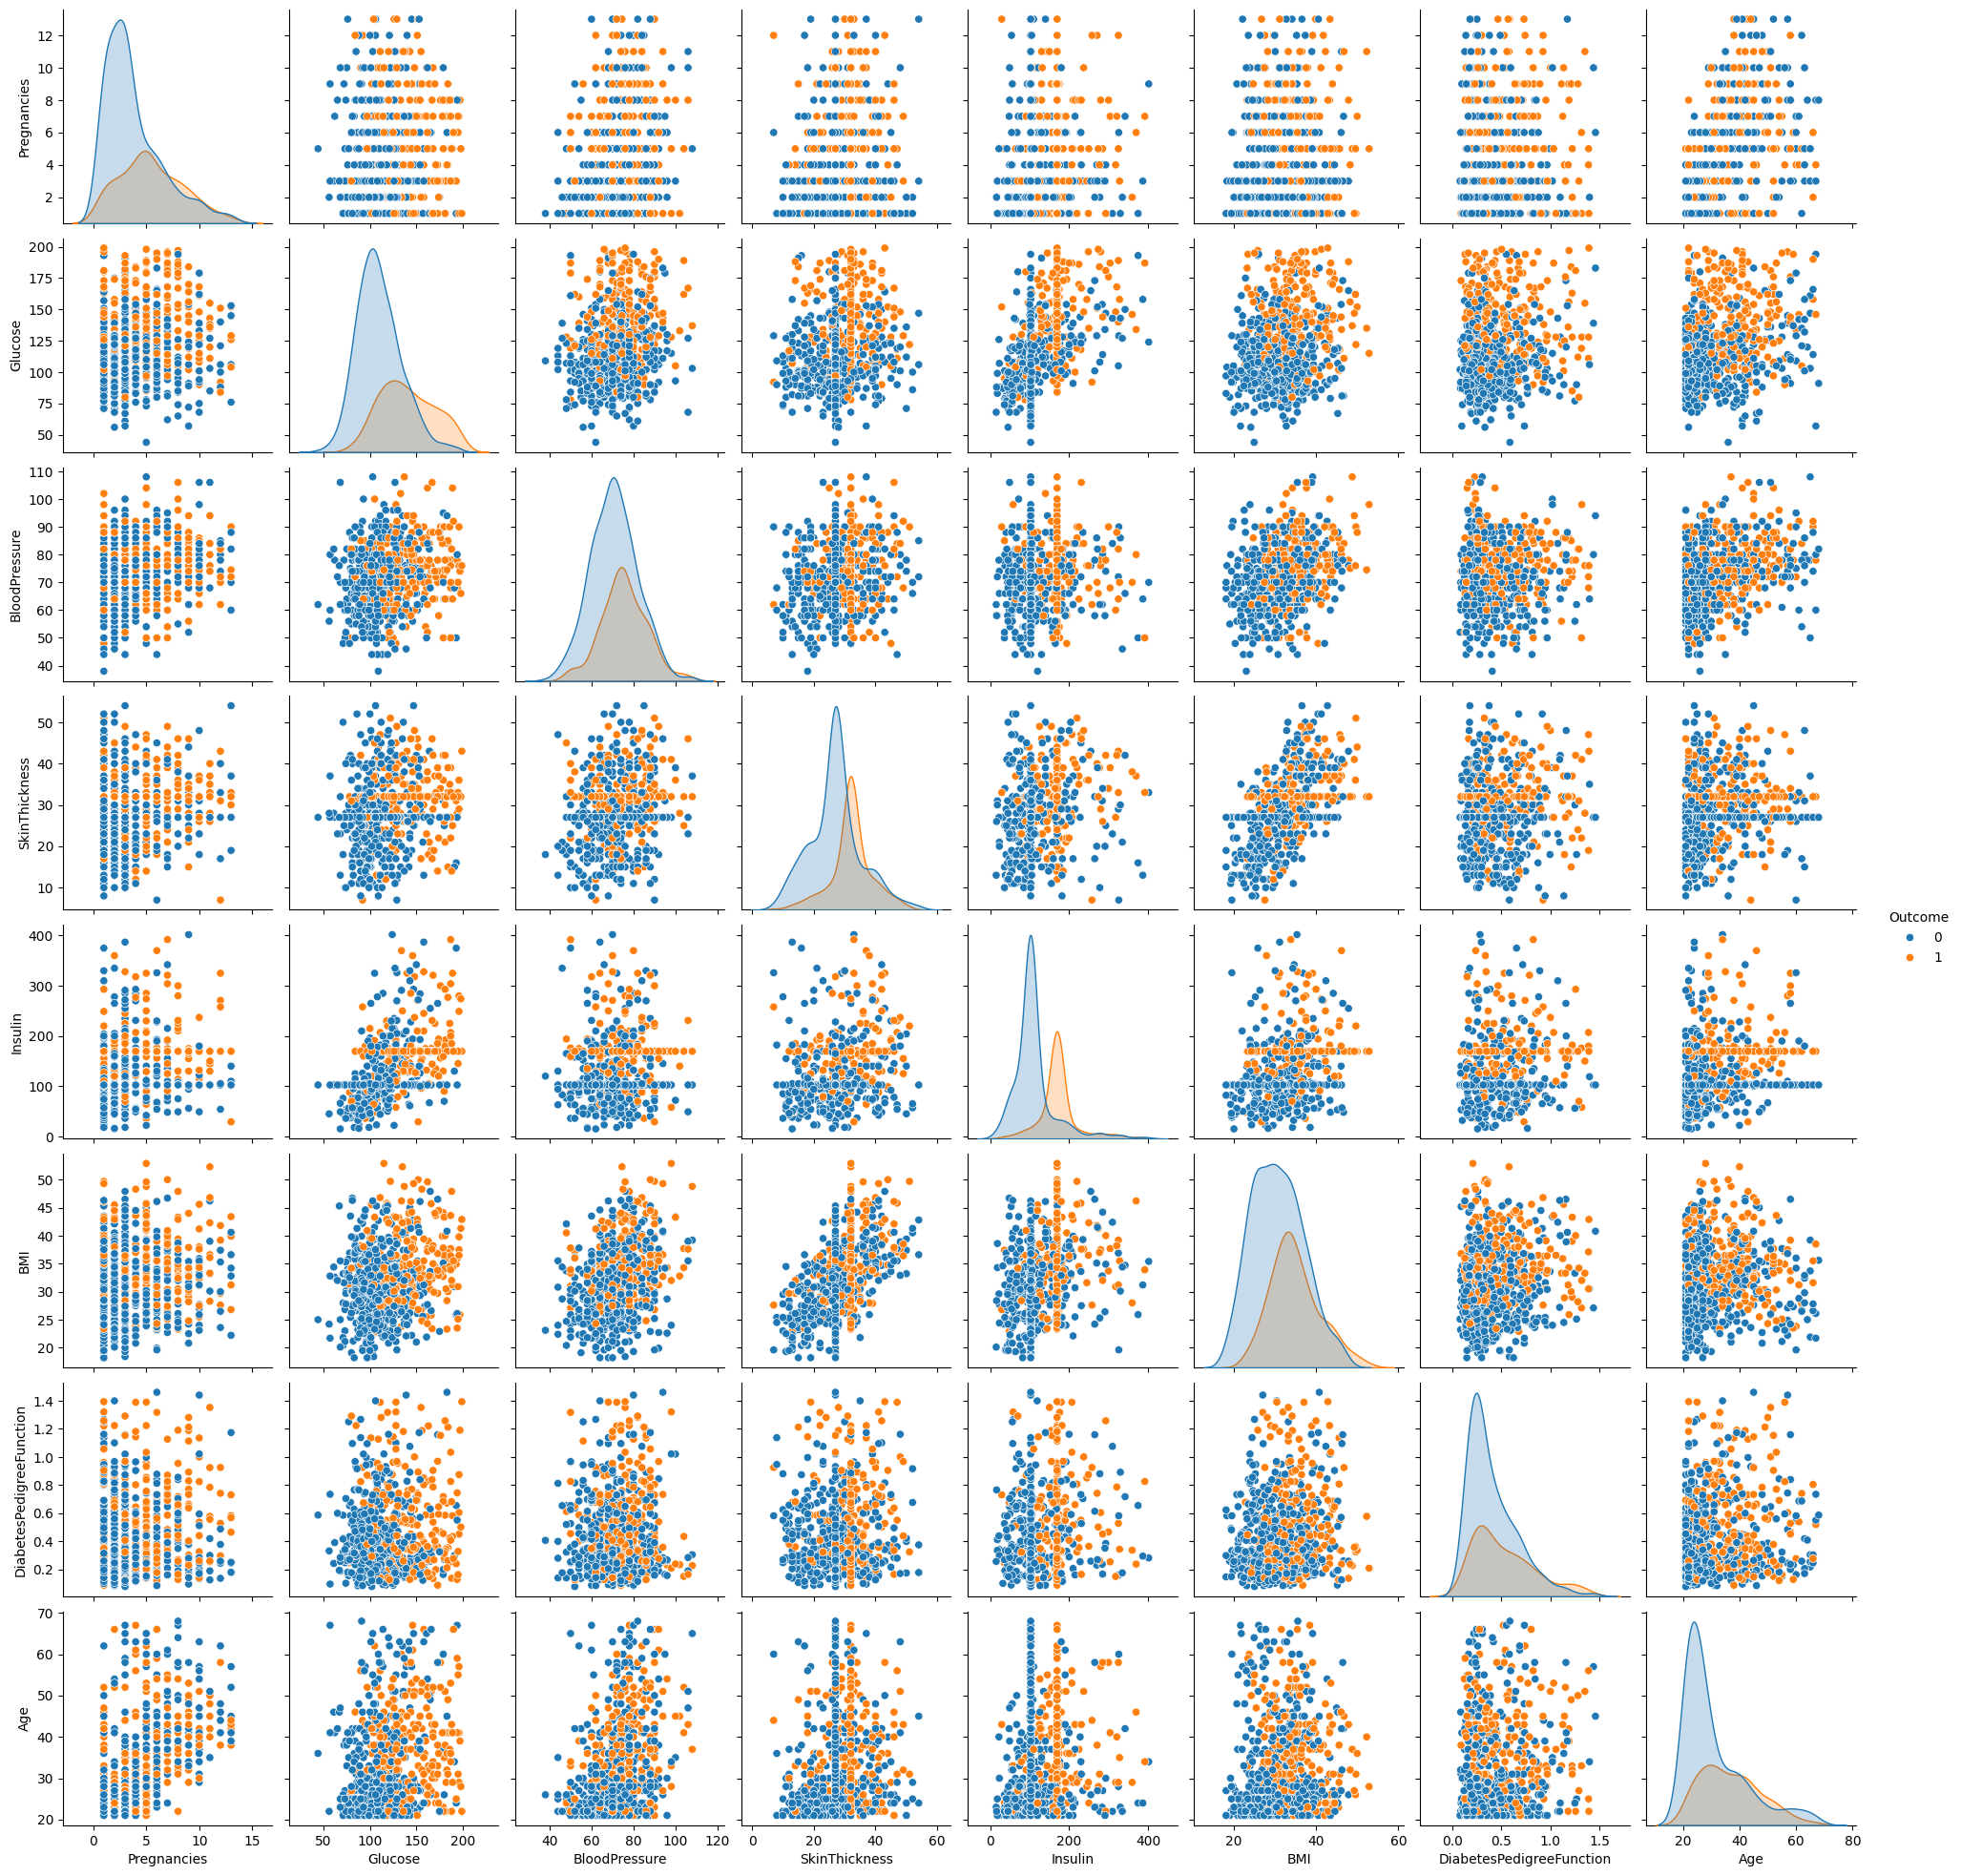

In [91]:
# Scattered plot after outlier removal
plot = sns.pairplot(df, hue="Outcome")

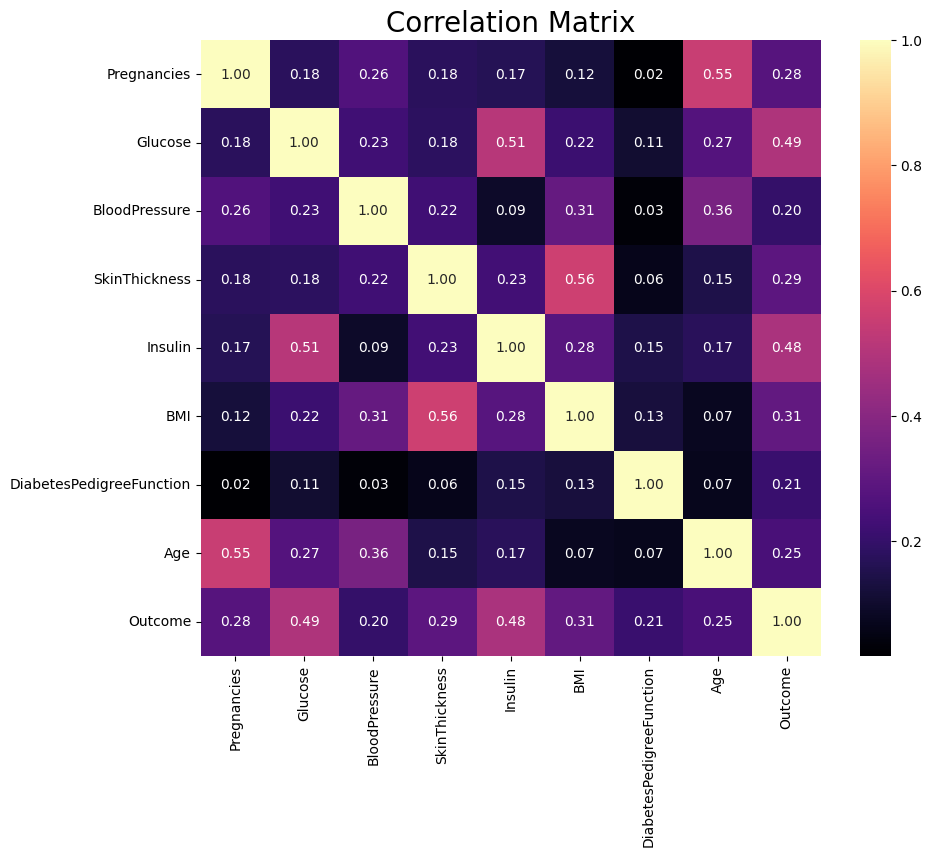

In [92]:
# Heatmap representation of Overall correlation between features
f, ax = plt.subplots(figsize=[10,8])
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

## Feature Engineering

In [93]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
5          5.0    116.0           74.0           27.0    102.5  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0

In [94]:
# Standardized scaling features - Glucose, BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction
df_new = df
scaler = StandardScaler()
df_new = pd.DataFrame(scaler.fit_transform(df_new.drop(["Outcome","Pregnancies","BMI","Age"], axis=1)))
df_new.columns=["Glucose","BloodPressure","SkinThickness","Insulin","DiabetesPedigreeFunction"]
df_new.head(10)
# df_new is the final df with preprocessed data

Glucose  BloodPressure  SkinThickness   Insulin  DiabetesPedigreeFunction
0  0.943022      -0.024429       0.761357  0.620535                  0.629103
1 -1.181627      -0.554006       0.034860 -0.481675                 -0.347566
2  2.123383      -0.730532       0.398109  0.620535                  0.788342
3 -1.046729      -0.554006      -0.691638 -0.621507                 -0.998678
4 -0.136165       0.152097      -0.207306 -0.481675                 -0.878364
5 -1.417700      -1.966211       0.398109 -0.720213                 -0.712047
6 -0.169889      -0.200954      -0.207306 -0.481675                 -1.115454
7  0.167357       2.093879       0.398109  0.620535                 -0.768666
8 -0.338512       1.740828      -0.207306 -0.481675                 -0.913751
9  1.617514       0.152097       0.398109  0.620535                  0.310624

In [95]:
# Merging target feature "Outcome" with df_new to prevent mismatch later
df_new = df_new.merge(df["Outcome"], left_index=True, right_index=True)
df_new.head(5)

Glucose  BloodPressure  SkinThickness   Insulin  DiabetesPedigreeFunction  \
0  0.943022      -0.024429       0.761357  0.620535                  0.629103   
1 -1.181627      -0.554006       0.034860 -0.481675                 -0.347566   
2  2.123383      -0.730532       0.398109  0.620535                  0.788342   
3 -1.046729      -0.554006      -0.691638 -0.621507                 -0.998678   
5 -1.417700      -1.966211       0.398109 -0.720213                 -0.712047   

   Outcome  
0        1  
1        0  
2        1  
3        0  
5        0

In [96]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [97]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
5          5.0    116.0           74.0           27.0    102.5  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0

In [98]:
# Encoding categorical features
# Encoding "Age" feature
"""
    Young - from 21 till 45
    Senior - from 45 onwards
"""
df.loc[(df["Age"] >= 21) & (df["Age"] < 45), "Age_Category"] = "Young"
df.loc[(df["Age"] >= 45), "Age_Category"] = "Senior"

In [99]:
# Encoding "BMI" feature
"""
    Underweight - from 0 till 18.5
    Healthy - from 18.5 till 25
    Overweight - from 25 to 30
    Obese - from 30 till 100
"""
df['BMI_Category'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=["Underweight", "Healthy", "Overweight", "Obese"])

In [100]:
df.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
487          3.0    173.0           78.0           32.0    265.0  46.5   
474          4.0    114.0           64.0           27.0    102.5  28.9   
83           3.0    101.0           65.0           28.0    102.5  24.6   
368          3.0     81.0           86.0           16.0     66.0  27.5   
343          5.0    122.0           86.0           27.0    102.5  34.7   

     DiabetesPedigreeFunction  Age  Outcome Age_Category BMI_Category  
487                     1.159   58        0       Senior        Obese  
474                     0.126   24        0        Young   Overweight  
83                      0.237   22        0        Young      Healthy  
368                     0.306   22        0        Young   Overweight  
343                     0.290   33        0        Young        Obese

In [101]:
# One Hot Encoding "BMI" and "Age" features

def one_hot_encoder(df, categorical_cols, drop_first=False):
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=drop_first)
    return df

categorical_cols = ["BMI_Category", "Age_Category"] 
df = one_hot_encoder(df, categorical_cols, drop_first=True)

In [102]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
5          5.0    116.0           74.0           27.0    102.5  25.6   

   DiabetesPedigreeFunction  Age  Outcome  BMI_Category_Healthy  \
0                     0.627   50        1                 False   
1                     0.351   31        0                 False   
2                     0.672   32        1                  True   
3                     0.167   21        0                 False   
5                     0.201   30        0                 False   

   BMI_Category_Overweight  BMI_Category_Obese  Age_Category_Young  
0                    False                True               False  
1                     True               False                True  
2                    False               False                True  
3                     True               False                True  
5                     True               False                True

In [103]:
# Merging categorical feature encoded columns to df_new 
df_new = df_new.merge(df[["BMI_Category_Healthy", "BMI_Category_Overweight", "BMI_Category_Obese", "Age_Category_Young"]], left_index=True, right_index=True)

In [104]:
df_new.head(10)

Glucose  BloodPressure  SkinThickness   Insulin  \
0   0.943022      -0.024429       0.761357  0.620535   
1  -1.181627      -0.554006       0.034860 -0.481675   
2   2.123383      -0.730532       0.398109  0.620535   
3  -1.046729      -0.554006      -0.691638 -0.621507   
5  -1.417700      -1.966211       0.398109 -0.720213   
6  -0.169889      -0.200954      -0.207306 -0.481675   
7   0.167357       2.093879       0.398109  0.620535   
9   1.617514       0.152097       0.398109  0.620535   
10  0.639501       0.681674      -0.207306 -0.481675   
11  1.550065      -0.024429      -1.175970  0.711015   

    DiabetesPedigreeFunction  Outcome  BMI_Category_Healthy  \
0                   0.629103        1                 False   
1                  -0.347566        0                 False   
2                   0.788342        1                  True   
3                  -0.998678        0                 False   
5                  -0.712047        0                 False   
6                  -1.115454        1                 False   
7                  -0.768666        0                 False   
9                   0.310624        1                 False   
10                  3.509568        0                 False   
11                  0.487557        1                 False   

    BMI_Category_Overweight  BMI_Category_Obese  Age_Category_Young  
0                     False                True               False  
1                      True               False                True  
2                     False               False                True  
3                      True               False                True  
5                      True               False                True  
6                     False                True                True  
7                     False                True                True  
9                     False                True               False  
10                    False                True                True  
11                    False                True                True

In [105]:
# Spliting independant feature and target feature 
y = df_new["Outcome"]
X = df_new.drop(columns=["Outcome"])

In [106]:
X

Glucose  BloodPressure  SkinThickness   Insulin  \
0    0.943022      -0.024429       0.761357  0.620535   
1   -1.181627      -0.554006       0.034860 -0.481675   
2    2.123383      -0.730532       0.398109  0.620535   
3   -1.046729      -0.554006      -0.691638 -0.621507   
5   -1.417700      -1.966211       0.398109 -0.720213   
..        ...            ...            ...       ...   
714 -0.642034       0.328623       2.335436  0.793269   
715  0.066183      -0.200954      -0.207306 -0.481675   
716  0.032458      -0.024429      -0.691638 -0.325391   
717  0.201081      -1.083583       0.398109  0.620535   
718 -0.911831      -0.200954       0.277026 -0.481675   

     DiabetesPedigreeFunction  BMI_Category_Healthy  BMI_Category_Overweight  \
0                    0.629103                 False                    False   
1                   -0.347566                 False                     True   
2                    0.788342                  True                    False   
3                   -0.998678                 False                     True   
5                   -0.712047                 False                     True   
..                        ...                   ...                      ...   
714                 -0.984524                 False                     True   
715                 -0.386491                 False                    False   
716                 -0.722663                 False                    False   
717                 -0.354643                  True                    False   
718                 -0.474957                 False                    False   

     BMI_Category_Obese  Age_Category_Young  
0                  True               False  
1                 False                True  
2                 False                True  
3                 False                True  
5                 False                True  
..                  ...                 ...  
714               False                True  
715                True                True  
716                True                True  
717               False               False  
718                True                True  

[671 rows x 9 columns]

In [107]:
y

0      1
1      0
2      1
3      0
5      0
      ..
714    0
715    1
716    1
717    0
718    0
Name: Outcome, Length: 671, dtype: int64

### Model Comparison

In [108]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Logistic Regression, Decision Tree, Random Forest, K Nearest Neighbours Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"------ {name} ------")
    print(f"Accuracy: {accuracy:.4f}")
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    print("\n")


------ Logistic Regression ------
Accuracy: 0.6593
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        95
           1       0.36      0.20      0.26        40

    accuracy                           0.66       135
   macro avg       0.54      0.53      0.52       135
weighted avg       0.61      0.66      0.62       135



------ Decision Tree ------
Accuracy: 0.6074
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        95
           1       0.36      0.40      0.38        40

    accuracy                           0.61       135
   macro avg       0.54      0.55      0.54       135
weighted avg       0.62      0.61      0.61       135



------ Random Forest ------
Accuracy: 0.6444
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        95
           1       0.41

In [112]:

# Decision Tree Classifer Model with GridSearchCV

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_leaf_nodes':[5,8,10],
}

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train,y_train)
train_score2 = grid_search.best_score_
print("Best parameters:", grid_search.best_params_)
print("Decision Tree Classifier (train score) : ", train_score2)
accuracy2=grid_search.score(X_test, y_test)
print("Decision Tree Classifier (test score) : ", accuracy2)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Classifier (train score) :  0.6548459674627899
Decision Tree Classifier (test score) :  0.6592592592592592


In [113]:
# Support Vector Machine model

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_classifier = SVC(kernel='rbf', random_state=42)  
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

SVM Model Accuracy: 0.6444
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.76        95
           1       0.38      0.33      0.35        40

    accuracy                           0.64       135
   macro avg       0.56      0.55      0.55       135
weighted avg       0.63      0.64      0.64       135



In [118]:

# XGBoost Classifier Model

from xgboost import XGBClassifier
import sklearn.metrics as metrics

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, xgb_pred)))

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

Test Accuracy = 0.6444444444444445
[[70 25]
 [23 17]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        95
           1       0.40      0.42      0.41        40

    accuracy                           0.64       135
   macro avg       0.58      0.58      0.58       135
weighted avg       0.65      0.64      0.65       135



In [119]:
# Artificial Neural Network Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')
y_pred = (model.predict(X_test) > 0.5).astype("int32")


e:\EXPOSYS DATA LABS - Internship\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5348 - loss: 0.6837 - val_accuracy: 0.6389 - val_loss: 0.6815
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6688 - loss: 0.6417 - val_accuracy: 0.6296 - val_loss: 0.6675
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6733 - loss: 0.6294 - val_accuracy: 0.6389 - val_loss: 0.6531
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6763 - loss: 0.6150 - val_accuracy: 0.6481 - val_loss: 0.6419
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6776 - loss: 0.5918 - val_accuracy: 0.6481 - val_loss: 0.6281
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6935 - loss: 0.5754 - val_accuracy: 0.6481 - val_loss: 0.6187
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7063 - loss: 0.5605 - val_accuracy: 0.6667 - val_loss: 0.6082
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6971 - loss: 0.5600 - val_accuracy: 0.6574 - val_loss

In [120]:
"""
Model trained and their performances
    > Logistic Regression Classifier Model - 64%
    > Decision Tree Classifier Model - 62
    > Random Forest Classifier Model - 63%y
    > K Nearest Neighbour Classifier Model - 66%
    > XGBoost Classifier Model - 61%
    > Support Vector Machine Model - 64%
    > Artificial Neural Network Model - 55%
    > Decision Tree Classifier with GridSearchCV - 65%
"""

'\nModel trained and their performances\n    > Logistic Regression Classifier Model - 64%\n    > Decision Tree Classifier Model - 62\n    > Random Forest Classifier Model - 63%y\n    > K Nearest Neighbour Classifier Model - 66%\n    > XGBoost Classifier Model - 61%\n    > Support Vector Machine Model - 64%\n    > Artificial Neural Network Model - 55%\n    > Decision Tree Classifier with GridSearchCV - 65%\n'

In [121]:
# Till now the "Pregnancies" column is not being considered in the training data, But now it is being included

In [122]:
# X1 and y1 are the data including the "Pregnancy" feature
X1 = X
y1 = y
X1 = X1.merge(df[["Pregnancies"]], left_index=True, right_index=True)
X1

Glucose  BloodPressure  SkinThickness   Insulin  \
0    0.943022      -0.024429       0.761357  0.620535   
1   -1.181627      -0.554006       0.034860 -0.481675   
2    2.123383      -0.730532       0.398109  0.620535   
3   -1.046729      -0.554006      -0.691638 -0.621507   
5   -1.417700      -1.966211       0.398109 -0.720213   
..        ...            ...            ...       ...   
714 -0.642034       0.328623       2.335436  0.793269   
715  0.066183      -0.200954      -0.207306 -0.481675   
716  0.032458      -0.024429      -0.691638 -0.325391   
717  0.201081      -1.083583       0.398109  0.620535   
718 -0.911831      -0.200954       0.277026 -0.481675   

     DiabetesPedigreeFunction  BMI_Category_Healthy  BMI_Category_Overweight  \
0                    0.629103                 False                    False   
1                   -0.347566                 False                     True   
2                    0.788342                  True                    False   
3                   -0.998678                 False                     True   
5                   -0.712047                 False                     True   
..                        ...                   ...                      ...   
714                 -0.984524                 False                     True   
715                 -0.386491                 False                    False   
716                 -0.722663                 False                    False   
717                 -0.354643                  True                    False   
718                 -0.474957                 False                    False   

     BMI_Category_Obese  Age_Category_Young  Pregnancies  
0                  True               False          6.0  
1                 False                True          1.0  
2                 False                True          8.0  
3                 False                True          1.0  
5                 False                True          5.0  
..                  ...                 ...          ...  
714               False                True          3.0  
715                True                True          7.0  
716                True                True          3.0  
717               False               False         10.0  
718                True                True          1.0  

[671 rows x 10 columns]

In [123]:
# Train-Test-Split for X1 and y1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [124]:
# Logistic Regression, Decision Tree, Random Forest, K Nearest Neighbours Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

classifiers = {
    'Logistic Regression1': LogisticRegression(),
    'Decision Tree1': DecisionTreeClassifier(),
    'Random Forest1': RandomForestClassifier(),
}

for name, classifier in classifiers.items():
    classifier.fit(X1_train, y1_train)
    y1_pred = classifier.predict(X1_test)
    accuracy = accuracy_score(y1_test, y1_pred)
    print(f"------ {name} ------")
    print(f"Accuracy: {accuracy:.4f}")
    report = classification_report(y1_test, y1_pred)
    print("Classification Report:")
    print(report)
    print("\n")


------ Logistic Regression1 ------
Accuracy: 0.6593
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        95
           1       0.41      0.33      0.36        40

    accuracy                           0.66       135
   macro avg       0.57      0.56      0.56       135
weighted avg       0.64      0.66      0.65       135



------ Decision Tree1 ------
Accuracy: 0.7259
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        95
           1       0.53      0.65      0.58        40

    accuracy                           0.73       135
   macro avg       0.68      0.70      0.69       135
weighted avg       0.75      0.73      0.73       135



------ Random Forest1 ------
Accuracy: 0.6741
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        95
           1       0

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)
y1_pred = knn1.predict(X1_test)

print("Accuracy:", accuracy_score(y1_train, knn1.predict(X1_train)))
print("Confusion matrix:\n", confusion_matrix(y1_test, y1_pred))
print("Classification report:\n", classification_report(y1_test, y1_pred))

print("Value of k (n_neighbors):", knn1.n_neighbors)
print("Parameters of the model:\n", knn1.get_params())


Accuracy: 0.789179104477612
Confusion matrix:
 [[67 28]
 [18 22]]
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.74        95
           1       0.44      0.55      0.49        40

    accuracy                           0.66       135
   macro avg       0.61      0.63      0.62       135
weighted avg       0.69      0.66      0.67       135

Value of k (n_neighbors): 5
Parameters of the model:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [126]:
# Decision Tree Classifer Model with GridSearchCV

from sklearn.tree import DecisionTreeClassifier 

dt1 = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_leaf_nodes':[5,8,10],
}

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X1_train,y1_train)
train_score2 = grid_search.best_score_
print("Best parameters:", grid_search.best_params_)
print("Decision Tree Classifier (train score) : ", train_score2)
accuracy2=grid_search.score(X1_test, y1_test)
print("Decision Tree Classifier (test score) : ", accuracy2)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classifier (train score) :  0.7163724472135686
Decision Tree Classifier (test score) :  0.6666666666666666


In [127]:
"""
Model Performance with "Pregnancy" Feature
    > Logistic Regression Classifier Model - 65.9%
    > Decision Tree Classifier Model - 72.6%
    > Random Forest Classifier Model - 66.7%
    > K Nearest Neighbour Classifier Model - 78.9%
    > Decision Tree Classifier with GridSearchCV - 71.3%
"""

'\nModel Performance with "Pregnancy" Feature\n    > Logistic Regression Classifier Model - 65.9%\n    > Decision Tree Classifier Model - 72.6%\n    > Random Forest Classifier Model - 66.7%\n    > K Nearest Neighbour Classifier Model - 78.9%\n    > Decision Tree Classifier with GridSearchCV - 71.3%\n'

In [128]:
"""
BEST FITTED MODEL
The highest accuracy is K Nearest Neighbours Classifier Model (with "Pregnancies" feature)
    Performance:
        Accuracy = 78.91% ~ 79 % 
    Hyperparameters:
        n_neighbors(k): 5
        algorithm: 'auto'
        leaf_size: 30
        metric: 'minkowski'
        metric_params: None
        n_jobs: None
        p: 2
        weights: 'uniform'
"""

'\nBEST FITTED MODEL\nThe highest accuracy is K Nearest Neighbours Classifier Model (with "Pregnancies" feature)\n    Performance:\n        Accuracy = 78.91% ~ 79 % \n    Hyperparameters:\n        n_neighbors(k): 5\n        algorithm: \'auto\'\n        leaf_size: 30\n        metric: \'minkowski\'\n        metric_params: None\n        n_jobs: None\n        p: 2\n        weights: \'uniform\'\n'

In [129]:
# Pickeling the model and the data preprocessor save it 
import pickle
pickle.dump(knn1, open('knn_model.pkl','wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))